For this instead of using The differebce images. Here the images used to make the difference images are combined and used in the model.

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Used to work with arrays and matrix data structures
import numpy as np
# Data manipulation and analysis tool using data structures
import pandas as pd
# Used to evaluate machine learning performance, by splitting dataset
from sklearn.model_selection import train_test_split
# Training and inference of neural networks
import tensorflow as tf
# Measure of variance form dependent value to independent value
from sklearn.metrics import r2_score
# Data visualisation
import seaborn as sns
# Data visualisation
import matplotlib.pyplot as plt
# Using Linear Regression
from sklearn.linear_model import LinearRegression
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, ImageChops
import glob
import os
import csv
from pathlib import Path
import math

In [ ]:
# Reading in Split dataset
sep_data = pd.read_csv('Data_Table_Complete_CSV_CLEAN.csv')
# Printing contents of dataset
print(sep_data)

    Scan_Height_mm  Scan_Height_Layers  mm_per_Layer_Height  Scan_Width_mm  \
0             24.8                  55             0.450909           21.7   
1             26.3                  46             0.571739           18.5   
2             25.4                  58             0.437931           20.4   
3             25.3                  36             0.702778           21.6   
4             27.8                  46             0.604348           21.9   
5             30.0                  46             0.652174           22.7   
6             23.6                  41             0.575610           20.8   
7             27.1                  60             0.451667           20.8   
8             26.0                  45             0.577778           21.6   
9             23.9                  48             0.497917           19.8   
10            26.0                  20             1.300000           22.2   
11            27.2                  27             1.007407     

In [ ]:
# read by default 1st sheet of an excel file
dataframe1 = pd.read_excel('Error_Per_Diff_Image_Updated.xls')
 
print(dataframe1)

    ERR1  ERR2  ERR3  ERR4  ERR5  ERR6  ERR7  ERR8  ERR9  ERR10  ERR11  ERR12  \
0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
1    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
2    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
3    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
4    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
89   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
90   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
91   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
92   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
93   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   

    ERR13  
0     0.0  
1  

In [ ]:
# read by default 1st sheet of an excel file
dataframe2 = pd.read_excel('Percentage_Of_Total_Error_Diff_Image_Updated .xls')

print(dataframe2)

    PER1  PER2  PER3  PER4  PER5  PER6  PER7  PER8  PER9  PER10  PER11  PER12  \
0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
1    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
2    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
3    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
4    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
89   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
90   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
91   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
92   NaN   NaN   0.0   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   
93   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN    NaN    NaN    NaN   

    PER13  
0     0.0  
1  

In [ ]:
# read by default 1st sheet of an excel file
#dataframe3 = pd.read_excel('Var_mm_per_Layer.xls')
 
#print(dataframe3)

In [ ]:
print(sep_data['Scan_Height_mm'][0])

24.8


In [ ]:
for i in range(88):
  print(dataframe2['PER1'][i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.011430796532531278
0.016161412526863386
0.018575703987474542
0.019844623142161278
0.01718210507373278
0.01943585122049618
0.01992699764581241
0.01751279562548752
0.019272712138346706
0.01963169563399031
0.022813205870192567
0.021103405731071185
0.018815582835240378
0.019854223066220512
0.01886352282867904
0.02126392123149018
0.020272237150799777
0.018900312599763183
0.0199969697631013
0.018927204312500542
0.0209075315041483
0.022181161180578383
0.022147382565798533
0.021241501533066132
0.019325004892383656
0.018933375692252907
0.018397747631233644
0.01949040979511854
0.020616462999209464
0.019311320528584933
0.019889045151006805
0.018708612252866054
0.01834575301148425
0.018984177774852083
0.02054252569589611
0.021619535809684426
0.021185690794436052
0.02007171202899105
0.018548216006162077
0.01961398645730961
0.021489698327454718
0.01950749288979537
0.01831713211987908
0.014888468559294675
0.017219252605961993
0

In [ ]:
print(dataframe2['PER1'][86])

0.0


In [ ]:
imagelist= []

In [ ]:
image_dir = Path(f'/content/drive/MyDrive/Seg_All')

In [ ]:
filepaths = pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Filepath').astype(str)

images = pd.concat([filepaths], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [ ]:
print(filepaths[300:400])

300    /content/drive/MyDrive/Seg_All/Seg11/image.002...
301    /content/drive/MyDrive/Seg_All/Seg11/image.002...
302    /content/drive/MyDrive/Seg_All/Seg11/image.002...
303    /content/drive/MyDrive/Seg_All/Seg11/image.002...
304    /content/drive/MyDrive/Seg_All/Seg11/image.003...
                             ...                        
395    /content/drive/MyDrive/Seg_All/Seg9/image.0068...
396    /content/drive/MyDrive/Seg_All/Seg9/image.0067...
397    /content/drive/MyDrive/Seg_All/Seg9/image.0075...
398    /content/drive/MyDrive/Seg_All/Seg9/image.0071...
399    /content/drive/MyDrive/Seg_All/Seg9/image.0077...
Name: Filepath, Length: 100, dtype: object


In [ ]:
print(images)

                                               Filepath
0     /content/drive/MyDrive/Seg_All/Seg5/image.0005...
1     /content/drive/MyDrive/Seg_All/Seg11/image.003...
2     /content/drive/MyDrive/Seg_All/Seg10/image.007...
3     /content/drive/MyDrive/Seg_All/Seg13/image.004...
4     /content/drive/MyDrive/Seg_All/Seg10/image.008...
...                                                 ...
1044  /content/drive/MyDrive/Seg_All/Seg10/image.005...
1045  /content/drive/MyDrive/Seg_All/Seg7/image.0019...
1046  /content/drive/MyDrive/Seg_All/Seg4/image.0052...
1047  /content/drive/MyDrive/Seg_All/Seg10/image.000...
1048  /content/drive/MyDrive/Seg_All/Seg3/image.0051...

[1049 rows x 1 columns]


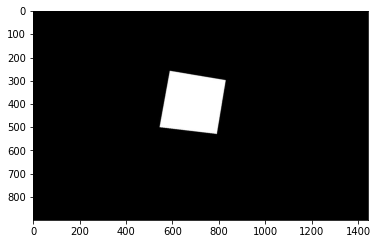

In [ ]:
img1 = cv2.imread(f'/content/drive/MyDrive/1.5_echo_cube/image.0040.jpg')
plt.imshow(img1)
img1 = cv2.resize(img1,(1442, 450))

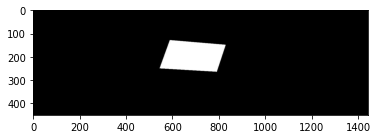

In [ ]:
plt.imshow(img1)

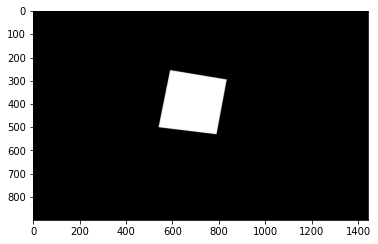

In [ ]:
img2 = cv2.imread(f'/content/drive/MyDrive/1.5_echo_cube/image.0041.jpg')
plt.imshow(img2)
img2 = cv2.resize(img2,(1442, 450))

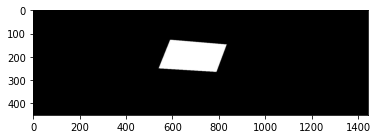

In [ ]:
plt.imshow(img2)

In [ ]:
outputImage= np.zeros((900, 1442, 3), dtype="uint8")

In [ ]:
outputImage[0:450, 0:1442] = img1
        #plt.imshow(img1)
outputImage[450:900, 0:1442] = img2

In [ ]:
images = []
images.append(outputImage)

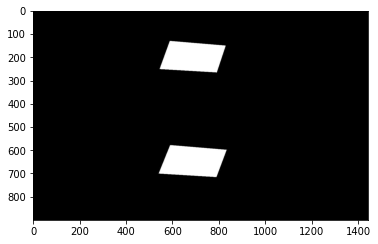

In [ ]:
plt.imshow(images[0])

In [ ]:
inputImages = []

outputImage = np.zeros((900, 1442, 3), dtype="uint8")

images= []

for i in range(1,87):
  if i < 10:
        print(i-1)
        print(i)
        print('-')
        img1 = cv2.imread(f'/content/drive/MyDrive/1.5_echo_cube/image.000{i}.jpg')
        img1 = cv2.resize(img1,(1442, 450))
        inputImages.append(img1)
    
  else:
        img1 = cv2.imread(f'/content/drive/MyDrive/1.5_echo_cube/image.00{i}.jpg')
        img1 = cv2.resize(img1,(1442, 450))
        inputImages.append(img1)

0
1
-
1
2
-
2
3
-
3
4
-
4
5
-
5
6
-
6
7
-
7
8
-
8
9
-


In [ ]:
for i in range(len(inputImages)-1):
  outputImage = np.zeros((900, 1442, 3), dtype="uint8")
  outputImage[0:450, 0:1442] = inputImages[i]
  outputImage[450:900, 0:1442] = inputImages[i+1]
  images.append(outputImage)

In [ ]:
for l in range(1,14):
  print(l)
  count = 0
  inputImages = []
  images = []
  # Iterate directory
  for path in os.listdir(f'/content/drive/MyDrive/Seg_All/Seg{l}'):
      # check if current path is a file
      #print(path)
      if os.path.isfile(os.path.join(f'/content/drive/MyDrive/Seg_All/Seg{l}', path)):
          count += 1
  print(count)

  for i in range(1,count+1):
    if i < 10:
        #print(i-1)
        #print(i)
        #print('-')
        img1 = cv2.imread(f'/content/drive/MyDrive/Seg_All/Seg{l}/image.000{i}.jpg')
        img1 = cv2.resize(img1,(1442, 450))
        inputImages.append(img1)
    
    else:
        img1 = cv2.imread(f'/content/drive/MyDrive/Seg_All/Seg{l}/image.00{i}.jpg')
        img1 = cv2.resize(img1,(1442, 450))
        inputImages.append(img1)

  for i in range(len(inputImages)-1):
    outputImage = np.zeros((900, 1442, 3), dtype="uint8")
    outputImage[0:450, 0:1442] = inputImages[i]
    outputImage[450:900, 0:1442] = inputImages[i+1]
    cv2.imwrite(f'/content/drive/My Drive/Combine_All/Combine{l}/{i+1}.png' , outputImage)
    #images.append(outputImage)
  # Save Image
  #cv2.imwrite(f'/content/drive/My Drive/Combine_All/Combine{l}/{i}.png' , images)


1
88
2
82
3
94
4
84
5
78
6
78
7
80
8
95
9
79
10
88
11
50
12
62
13
91


In [ ]:
data1 = []
for l in range(1,14):
  count = 0
  #print(l)
  # Iterate directory
  for path in os.listdir(f'/content/drive/MyDrive/Combine_All/Combine{l}'):
      # check if current path is a file
      #print(path)
      if os.path.isfile(os.path.join(f'/content/drive/MyDrive/Combine_All/Combine{l}', path)):
          count += 1
  #print(count)

  for i in range(1,count+1): 
      for image1 in glob.glob(f'/content/drive/MyDrive/Combine_All/Combine{l}/{i}.png'):      
          data1.append(image1)

In [ ]:
print(len(data1))

1036


In [ ]:
print(len(inputImages))

91


In [ ]:
print(len(images))

0


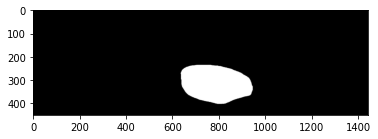

In [ ]:
plt.imshow(inputImages[34])

In [ ]:
plt.imshow(images[68])

IndexError: ignored

In [ ]:
data4 = []

for (columnName, columnData) in dataframe3.iteritems():
  print('Column Name : ', columnName)
  for i in range(94):
    #if columnData[i]== 'Nan':
    if math.isnan(columnData[i])==True:
       break
    else:
      #print(i)
      data4.append(columnData[i])

In [ ]:
data3 = []

for (columnName, columnData) in dataframe2.iteritems():
  print('Column Name : ', columnName)
  for i in range(94):
    #if columnData[i]== 'Nan':
    if math.isnan(columnData[i])==True:
       break
    else:
      print(i)
      data3.append(columnData[i])

Column Name :  PER1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
Column Name :  PER2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
Column Name :  PER3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
Column Name :  PER4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


In [ ]:
print(len(data1))
#print(len(data2))

1036


In [ ]:
print(len(data3))

1036


In [ ]:
#print(len(data4))

In [ ]:
for (columnName, columnData) in dataframe2.iteritems():
    print('Column Name : ', columnName)
    print('Column Contents : ', columnData)

In [ ]:
data = {
  "Image1": data1,
  "Diff_Data": data3
}

In [ ]:
#load data into a DataFrame object:
df = pd.DataFrame(data)
 
print(df)

                                                 Image1  Diff_Data
0     /content/drive/MyDrive/Combine_All/Combine1/1.png        0.0
1     /content/drive/MyDrive/Combine_All/Combine1/2.png        0.0
2     /content/drive/MyDrive/Combine_All/Combine1/3.png        0.0
3     /content/drive/MyDrive/Combine_All/Combine1/4.png        0.0
4     /content/drive/MyDrive/Combine_All/Combine1/5.png        0.0
...                                                 ...        ...
1031  /content/drive/MyDrive/Combine_All/Combine13/8...        0.0
1032  /content/drive/MyDrive/Combine_All/Combine13/8...        0.0
1033  /content/drive/MyDrive/Combine_All/Combine13/8...        0.0
1034  /content/drive/MyDrive/Combine_All/Combine13/8...        0.0
1035  /content/drive/MyDrive/Combine_All/Combine13/9...        0.0

[1036 rows x 2 columns]


In [ ]:
image_df = df.sample(1036, random_state=1).reset_index(drop=True)

train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    #rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    #rescale=1./255
)

In [ ]:
train_df

,Image1,Diff_Data
286,/content/drive/MyDrive/Combine_All/Combine12/5...,0.000000
602,/content/drive/MyDrive/Combine_All/Combine3/65...,0.013523
386,/content/drive/MyDrive/Combine_All/Combine1/59...,0.021490
688,/content/drive/MyDrive/Combine_All/Combine12/4...,0.033513
578,/content/drive/MyDrive/Combine_All/Combine6/25...,0.022280
...,...,...
960,/content/drive/MyDrive/Combine_All/Combine4/22...,0.000000
847,/content/drive/MyDrive/Combine_All/Combine4/57...,0.021306
715,/content/drive/MyDrive/Combine_All/Combine13/6...,0.000000
905,/content/drive/MyDrive/Combine_All/Combine13/4...,0.034668


In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Image1',
    y_col='Diff_Data',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Image1',
    y_col='Diff_Data',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Image1',
    y_col='Diff_Data',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=False
)

Found 580 validated image filenames.
Found 145 validated image filenames.
Found 311 validated image filenames.


In [ ]:
inputs = tf.keras.Input(shape=(120, 120, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
19/19 [==============================] - 21s 1s/step - loss: 0.3421 - val_loss: 0.0029
Epoch 2/50
19/19 [==============================] - 22s 1s/step - loss: 0.0280 - val_loss: 0.0042
Epoch 3/50
19/19 [==============================] - 20s 1s/step - loss: 0.0073 - val_loss: 0.0032
Epoch 4/50
19/19 [==============================] - 20s 1s/step - loss: 0.0024 - val_loss: 0.0011
Epoch 5/50
19/19 [==============================] - 20s 1s/step - loss: 0.0011 - val_loss: 7.1653e-04
Epoch 6/50
19/19 [==============================] - 20s 1s/step - loss: 8.8891e-04 - val_loss: 7.9779e-04
Epoch 7/50
19/19 [==============================] - 20s 1s/step - loss: 6.8422e-04 - val_loss: 6.6308e-04
Epoch 8/50
19/19 [==============================] - 20s 1s/step - loss: 9.3171e-04 - val_loss: 0.0015
Epoch 9/50
19/19 [==============================] - 20s 1s/step - loss: 9.8248e-04 - val_loss: 6.9783e-04
Epoch 10/50
19/19 [==============================] - 20s 1s/step - loss: 8.4596e-04 - 

In [ ]:
predicted_layer_perc = np.squeeze(model.predict(test_images))
true_layer_perc = test_images.labels

rmse = np.sqrt(model.evaluate(test_images, verbose=0))
print("     Test RMSE: {:.5f}".format(rmse))

r2 = r2_score(true_layer_perc, predicted_layer_perc)
print("Test R^2 Score: {:.5f}".format(r2))

10/10 [==============================] - 8s 827ms/step
     Test RMSE: 0.01360
Test R^2 Score: -0.00056


In [ ]:
print(true_layer_perc)

In [ ]:
print(predicted_layer_perc)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')